# Preprocessing


In [ ]:
pip install lda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 351 kB 6.0 MB/s 
     |████████████████████████████████| 99 kB 9.2 MB/s 


In [ ]:
!pip install pyldavis
!pip install vaderSentiment
import pyLDAvis.gensim_models 
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime
import copy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import re,string
import nltk
import os, csv, nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from patsy import dmatrices
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import PunktSentenceTokenizer, RegexpTokenizer
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import warnings
%pylab inline
import numpy as np
from google.colab import drive
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
drive.mount('/drive')
from sklearn.metrics.pairwise import cosine_similarity


from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Populating the interactive namespace from numpy and matplotlib
Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
goog_data = pd.read_csv('/drive/My Drive/MIS284/googledata.csv')
meta_data = pd.read_csv('/drive/My Drive/MIS284/metadata.csv')
net_data = pd.read_csv('/drive/My Drive/MIS284/netflixdata.csv')
app_data = pd.read_csv('/drive/My Drive/MIS284/appledata.csv')
amaz_data = pd.read_csv('/drive/My Drive/MIS284/amazondata.csv')
goog_data.head()

,web-scraper-order,web-scraper-start-url,TItle,TItle-href,Review,rating
0,1664994342-26033,https://www.indeed.com/cmp/Google/reviews?star...,Opportunity to grow is available,https://www.indeed.com/cmp/Google/reviews/oppo...,After working on the Google campus in Mountain...,3.0
1,1664994344-26034,https://www.indeed.com/cmp/Google/reviews?star...,Great experience,https://www.indeed.com/cmp/Google/reviews/grea...,Loved working in such a diverse company. The c...,5.0
2,1664994346-26035,https://www.indeed.com/cmp/Google/reviews?star...,Culture is Amazing!!!,https://www.indeed.com/cmp/Google/reviews/cult...,Great company overall! It is definitely worth ...,5.0
3,1664994348-26036,https://www.indeed.com/cmp/Google/reviews?star...,Non-Renewable Contract Disadvantage,https://www.indeed.com/cmp/Google/reviews/non-...,Typical day at work I was empowered to run my ...,4.0
4,1664994350-26037,https://www.indeed.com/cmp/Google/reviews?star...,Good people Good Company,https://www.indeed.com/cmp/Google/reviews/good...,Good place to start your career. Provide you e...,5.0


# **GOOGLE DATA**

In [ ]:
goog_data["pros_clean"] = goog_data.Review.apply(lambda x:re.sub(r'[^\w\s]', ' ', str(x).lower()))
goog_data["pros_clean"] = goog_data.pros_clean.apply(lambda x:re.sub(r'(\\n+)', ' ', x))
goog_data["pros_clean"] = goog_data.pros_clean.apply(lambda x:re.sub(r'^b[\'\"\'"\"''\s]', '', x.lower()))
goog_data["pros_clean"] = goog_data.pros_clean.apply(lambda x:re.sub(r'\s+', ' ', x))

#tokenizing and removing stop words
stop = set(stopwords.words('english'))
punc = string.punctuation
goog_data['pros_clean'] = goog_data.pros_clean.apply(lambda x: [word for word in word_tokenize(x) if word not in stop])
goog_data['pros_clean'] = goog_data['pros_clean'].apply(lambda x: [word for word in x if word not in punc])

goog_data.head()

<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<ipython-input-11-2b0de075cb47>:3: DeprecationWarning: invalid escape sequence \s
  goog_data["pros_clean"] = goog_data.pros_clean.apply(lambda x:re.sub(r'^b[\'\"\'"\"''\s]', '', x.lower()))


,web-scraper-order,web-scraper-start-url,TItle,TItle-href,Review,rating,pros_clean
0,1664994342-26033,https://www.indeed.com/cmp/Google/reviews?star...,Opportunity to grow is available,https://www.indeed.com/cmp/Google/reviews/oppo...,After working on the Google campus in Mountain...,3.0,"[working, google, campus, mountain, view, year..."
1,1664994344-26034,https://www.indeed.com/cmp/Google/reviews?star...,Great experience,https://www.indeed.com/cmp/Google/reviews/grea...,Loved working in such a diverse company. The c...,5.0,"[loved, working, diverse, company, company, pr..."
2,1664994346-26035,https://www.indeed.com/cmp/Google/reviews?star...,Culture is Amazing!!!,https://www.indeed.com/cmp/Google/reviews/cult...,Great company overall! It is definitely worth ...,5.0,"[great, company, overall, definitely, worth, w..."
3,1664994348-26036,https://www.indeed.com/cmp/Google/reviews?star...,Non-Renewable Contract Disadvantage,https://www.indeed.com/cmp/Google/reviews/non-...,Typical day at work I was empowered to run my ...,4.0,"[typical, day, work, empowered, run, business,..."
4,1664994350-26037,https://www.indeed.com/cmp/Google/reviews?star...,Good people Good Company,https://www.indeed.com/cmp/Google/reviews/good...,Good place to start your career. Provide you e...,5.0,"[good, place, start, career, provide, everythi..."


In [ ]:
#get POS
get_pros = goog_data['pros_clean'].apply(lambda x: [word for word in nltk.pos_tag(x)])

pro_adj = []

def get_adj(empty_list,pos_data):
    for review in pos_data:
        for word,pos in review:
            if pos == 'JJ' or pos == 'JJR' or pos == 'JJS': # if the POS-tag is adjective
                empty_list.append(word)
get_adj(pro_adj,get_pros)

In [ ]:
from collections import Counter
Counter(pro_adj).most_common(125)

[('great', 444),
 ('good', 258),
 ('best', 89),
 ('many', 74),
 ('free', 64),
 ('new', 63),
 ('google', 60),
 ('nice', 60),
 ('overall', 58),
 ('much', 58),
 ('full', 50),
 ('able', 39),
 ('bad', 37),
 ('hard', 34),
 ('amazing', 32),
 ('high', 31),
 ('long', 31),
 ('easy', 29),
 ('different', 29),
 ('typical', 28),
 ('awesome', 27),
 ('excellent', 27),
 ('helpful', 27),
 ('supportive', 27),
 ('friendly', 26),
 ('flexible', 25),
 ('professional', 24),
 ('difficult', 24),
 ('personal', 22),
 ('wonderful', 22),
 ('hardest', 21),
 ('enjoyable', 21),
 ('sure', 21),
 ('competitive', 20),
 ('happy', 20),
 ('little', 19),
 ('due', 19),
 ('willing', 18),
 ('productive', 17),
 ('open', 17),
 ('big', 17),
 ('large', 17),
 ('right', 16),
 ('short', 15),
 ('smart', 15),
 ('fantastic', 15),
 ('fun', 15),
 ('available', 14),
 ('better', 14),
 ('important', 14),
 ('cool', 13),
 ('workplace', 13),
 ('positive', 12),
 ('busy', 12),
 ('second', 11),
 ('constant', 11),
 ('clear', 11),
 ('salary', 11),
 ('

In [ ]:
pros_attribute = ['best', 'great', 'good', 'nice', 'amazing', 'awesome', 'helpful', 'supportive', 'flexible', 
                  'professional', 'personal', 'wonderful', 'enjoyable', 'happy', 'willing', 'productive', 'open', 'smart', 'fantastic', 
                  'positive', 'important', 'fun', 'collaborative', 'constant', 'true']

In [ ]:
cons_attribute = ['bad', 'hard', 'different', 'difficult', 'hardest', 'competitive', 'long', 'busy', 'horrible', 
                  'poor', 'average', 'stressful', 'typical', 'little', 'short','impossible', 'small', 'low', 'temporary']

In [ ]:
replacement = {'Work_Life_Balance':['time','life','balance','sabbatical','sabbaticals','focus','hour','day','health','flexible','week'
                                    ,'vacation','schedule','overtime'],
                'Culture_Value':['people','culture','team','care','value','product','coworkers','atmosphere','competitive'
                                ,'family','collaboration','respect','community','colleague','supportive','vision','diversity'],
                'Career_Opportunity':['opportunity','learn','industry','career','license','training','train','growth','grow'
                                    ,'level','position','development','advancement','advance','study','build','skill','resource'
                                    ,'education','potential'],
                'Company_Benefit':['company','benefit','pay','financial','financially','provide','salary','bonus','offer'
                                  ,'401k','package','stock','compensation','invest','investment','money','performance','reward'
                                  ,'retirement','promote','insurance'],
                'Senior_Management':['place','environment','management','help','manager','experience','match'
                                      ,'plan','office','support','location','leadership','treat','helpful','senior'
                                      ,'manage','leader','communication']}

In [ ]:
def getKeysByValue(dictOfElements, valueToFind):
    for k,v  in dictOfElements.items():
        if valueToFind in v:
            return(k)
    return  valueToFind

def replace_attributes(s):
    return([getKeysByValue(replacement,y) for y in s])

In [ ]:
goog_data['pros_replace'] = goog_data['pros_clean'].map(replace_attributes)

In [ ]:
def ratio(x,y):
    if x==0:
        return float(y)
    if y==0:
        return float(x)
    return(float(x)*float(y))

def get_lift(a,b,tokenized_data):
    '''Function to calculate lift scores given any two words from a list of tokenized words'''
    if (a==b):
        return 1
    p_a = len([i for i in tokenized_data if a in i])
    p_b = len([i for i in tokenized_data if (b in i)])
    p_a_b = len([i for i in tokenized_data if a in i if b in i])
    n = len(tokenized_data)
    return float(float(n)*float(p_a_b)/ratio(p_a,p_b))

In [ ]:
pros_list = replacement.keys()
lift_score = [get_lift(x,y,goog_data.pros_replace) for x in pros_attribute for y in pros_list]
formatted_lift_score = [ round(elem,2) for elem in lift_score ]

In [ ]:
google_pros = pd.DataFrame(reshape(formatted_lift_score,(len(pros_attribute),len(pros_list))),index =pros_attribute , columns = pros_list )
google_pros

,Work_Life_Balance,Culture_Value,Career_Opportunity,Company_Benefit,Senior_Management
best,1.04,1.16,1.44,1.31,1.02
great,1.04,1.20,1.27,1.25,1.23
good,1.19,1.05,1.03,1.33,1.14
nice,1.16,1.24,0.26,1.23,1.02
amazing,1.24,1.32,1.41,1.03,1.22
awesome,0.71,1.20,1.31,1.39,1.24
helpful,0.00,0.00,0.00,0.00,0.00
supportive,0.00,0.00,0.00,0.00,0.00
flexible,0.00,0.00,0.00,0.00,0.00
professional,0.87,1.37,1.97,0.69,1.00


In [ ]:
cons_list = replacement.keys()
lift_score = [get_lift(x,y,goog_data.pros_replace) for x in cons_attribute for y in cons_list]
formatted_lift_score = [ round(elem,2) for elem in lift_score ]

In [ ]:
google_cons = pd.DataFrame(reshape(formatted_lift_score,(len(cons_attribute),len(cons_list))),index =cons_attribute , columns = cons_list )
google_cons

,Work_Life_Balance,Culture_Value,Career_Opportunity,Company_Benefit,Senior_Management
bad,0.89,1.19,0.69,1.22,1.09
hard,0.96,1.33,0.83,1.28,1.17
different,0.68,1.34,1.32,0.95,1.04
difficult,1.34,1.45,1.11,1.29,0.83
hardest,1.40,1.23,0.66,0.94,1.41
competitive,0.00,0.00,0.00,0.00,0.00
long,1.47,1.00,0.95,0.97,1.05
busy,1.71,0.91,0.63,0.26,0.90
horrible,0.00,0.55,0.95,3.10,1.35
poor,1.10,0.82,0.95,0.77,1.80


High lift values - cons 
- typical (2.72): WLB
- low (2.09): WLB
- impossible (1.52): career opportunity 
- horrible (3.10): company benefit 
- poor (1.80): senior management 

In [ ]:
google_values = ['organize', 'information', 'accessible', 'useful', 'belonging', 'opportunity', 'protecting', 'advancing', 'sustainability', 'inclusion']

In [ ]:
mission_lift = [get_lift(x,y,goog_data.pros_replace) for x in google_values for y in pros_list]
formatted_lift_score = [ round(elem,2) for elem in mission_lift ]

In [ ]:
pd.DataFrame(reshape(formatted_lift_score,(len(google_values),len(cons_list))),index =google_values , columns = pros_list )

,Work_Life_Balance,Culture_Value,Career_Opportunity,Company_Benefit,Senior_Management
organize,1.47,2.18,0.00,3.10,0.90
information,1.68,0.31,0.54,0.89,0.77
accessible,0.00,0.00,1.27,1.03,0.60
useful,0.00,0.00,0.00,0.00,1.80
belonging,2.93,0.00,0.00,3.10,1.80
opportunity,0.00,0.00,0.00,0.00,0.00
protecting,0.00,2.18,3.80,3.10,1.80
advancing,0.00,0.00,3.80,0.00,0.00
sustainability,0.00,2.18,0.00,0.00,0.00
inclusion,1.95,2.18,2.53,3.10,1.20


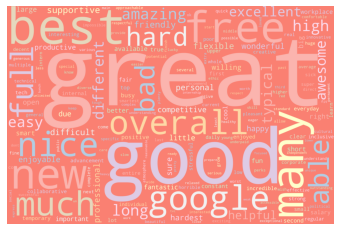

In [ ]:

google_pros_string = ','.join(pro_adj)

# Generate word cloud
word_cloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(google_pros_string)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [ ]:
core_values_goog = """Focus on the user and all else will follow. Since the beginning, we’ve focused on providing the best user experience possible. Whether we’re designing a new Internet browser or a new tweak to the look of the homepage, we take great care to ensure that they will ultimately serve you, rather than our own internal goal or bottom line. Our homepage interface is clear and simple, and pages load instantly. Placement in search results is never sold to anyone, and advertising is not only clearly marked as such, it offers relevant content and is not distracting. And when we build new tools and applications, we believe they should work so well you don’t have to consider how they might have been designed differently. It’s best to do one thing really, really well. We do search. With one of the world’s largest research groups focused exclusively on solving search problems, we know what we do well, and how we could do it better. Through continued iteration on difficult problems, we’ve been able to solve complex issues and provide continuous improvements to a service that already makes finding information a fast and seamless experience for millions of people. Our dedication to improving search helps us apply what we’ve learned to new products, like Gmail and Google Maps. Our hope is to bring the power of search to previously unexplored areas, and to help people access and use even more of the ever-expanding information in their lives. Fast is better than slow. We know your time is valuable, so when you’re seeking an answer on the web you want it right away–and we aim to please. We may be the only people in the world who can say our goal is to have people leave our website as quickly as possible. By shaving excess bits and bytes from our pages and increasing the efficiency of our serving environment, we’ve broken our own speed records many times over, so that the average response time on a search result is a fraction of a second. We keep speed in mind with each new product we release, whether it’s a mobile application or Google Chrome, a browser designed to be fast enough for the modern web. And we continue to work on making it all go even faster. Democracy on the web works. Google search works because it relies on the millions of individuals posting links on websites to help determine which other sites offer content of value. We assess the importance of every web page using more than 200 signals and a variety of techniques, including our patented PageRank™ algorithm, which analyzes which sites have been “voted” to be the best sources of information by other pages across the web. As the web gets bigger, this approach actually improves, as each new site is another point of information and another vote to be counted. In the same vein, we are active in open source software development, where innovation takes place through the collective effort of many programmers. You don’t need to be at your desk to need an answer. The world is increasingly mobile: people want access to information wherever they are, whenever they need it. We’re pioneering new technologies and offering new solutions for mobile services that help people all over the globe to do any number of tasks on their phone, from checking email and calendar events to watching videos, not to mention the several different ways to access Google search on a phone. In addition, we’re hoping to fuel greater innovation for mobile users everywhere with Android, a free, open source mobile platform.
Android brings the openness that shaped the Internet to the mobile world. Not only does Android benefit consumers, 
who have more choice and innovative new mobile experiences, but it opens up revenue opportunities for carriers, manufacturers and developers. You can make money without doing evil. Google is a business. The revenue we generate is derived from offering search technology to companies and from the sale of advertising displayed on our site and on other sites across the web. Hundreds of thousands of advertisers worldwide use AdWords to promote their products; hundreds of thousands of publishers take advantage of our AdSense program to deliver ads relevant to their site content. To ensure that we’re ultimately serving all our users (whether they are advertisers or not), we have a set of guiding principles for our advertising programs and practices: We don’t allow ads to be displayed on our results pages unless they are relevant where they are shown. And we firmly believe that ads can provide useful information if, and only if, they are relevant to what you wish to find–so it’s possible that certain searches won’t lead to any ads at all. We believe that advertising can be effective without being flashy. We don’t accept pop–up advertising, which interferes with your ability to see the content you’ve requested. We’ve found that text ads that are relevant to the person reading them draw much higher clickthrough rates than ads appearing randomly. Any advertiser, whether small or large, can take advantage of this highly targeted medium. Advertising on Google is always clearly identified as a “Sponsored Link,” so it does not compromise the integrity of our search results. We never manipulate rankings to put our partners higher in our search results and no one can buy better PageRank. Our users trust our objectivity and no short-term gain could ever justify breaching that trust. There’s always more information out there. Once we’d indexed more of the HTML pages on the Internet than any other search service, our engineers turned their attention to information that was not as readily accessible. Sometimes it was just a matter of integrating new databases into search, such as adding a phone number and address lookup and a business directory. Other efforts required a bit more creativity, like adding the ability to search news archives, patents, academic journals, billions of images and millions of books. And our researchers continue looking into ways to bring all the world’s information to people seeking answers. The need for information crosses all borders. Our company was founded in California, but our mission is to facilitate access to information for the entire world, and in every language. To that end, we have offices in more than 60 countries, maintain more than 180 Internet domains, and serve more than half of our results to people living outside the United States. We offer Google’s search interface in more than 130 languages, offer people the ability to restrict results to content written in their own language, and aim to provide the rest of our applications and products in as many languages and accessible formats as possible. Using our translation tools, people can discover content written on the other side of the world in languages they don’t speak. With these tools and the help of volunteer translators, we have been able to greatly improve both the variety and quality of services we can offer in even the most far-flung corners of the globe. You can be serious without a suit. Our founders built Google around the idea that work should be challenging, and the challenge should be fun. We believe that great, creative things are more likely to happen with the right company culture–and that doesn’t just mean lava lamps and rubber balls. There is an emphasis on team achievements and pride in individual accomplishments that contribute to our overall success. We put great stock in our employees–energetic, passionate people from diverse backgrounds with creative approaches to work, play and life. Our atmosphere may be casual, but as new ideas emerge in a café line, at a team meeting or at the gym, they are traded, tested and put into practice with dizzying speed–and they may be the launch pad for a new project destined for worldwide use. Great just isn’t good enough.We see being great at something as a starting point, not an endpoint. We set ourselves goals we know we can’t reach yet, because we know that by stretching to meet them we can get further than we expected. Through innovation and iteration, we aim to take things that work well and improve upon them in unexpected ways. For example, when one of our engineers saw that search worked well for properly spelled words, he wondered about how it handled typos. That led him to create an intuitive and more helpful spell checker. Even if you don’t know exactly what you’re looking for, finding an answer on the web is our problem, not yours. We try to anticipate needs not yet articulated by our global audience, and meet them with products and services that set new standards. When we launched Gmail, it had more storage space than any email service available. In retrospect offering that seems obvious–but that’s because now we have new standards for email storage. Those are the kinds of changes we seek to make, and we’re always looking for new places where we can make a difference. Ultimately, our constant dissatisfaction with the way things are becomes the driving force behind everything we do.""" 
goog_cons = ",".join(cons_attribute)
goog_pros = ",".join(pros_attribute)
data_goog_cons = [core_values_goog, goog_cons]
data_goog_pros = [core_values_goog, goog_pros]

In [ ]:
stopwords_nltk=set(stopwords.words('english'))
count_vectorizer = CountVectorizer(stop_words=stopwords_nltk,decode_error='ignore')
vector_matrix = count_vectorizer.fit_transform(data_goog_pros)
cosine_similarity_matrix = cosine_similarity(vector_matrix)
goog_pro_score = cosine_similarity_matrix[0,1]

In [ ]:
vector_matrix = count_vectorizer.fit_transform(data_goog_cons)
tokens = count_vectorizer.get_feature_names()
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
goog_cons_score= cosine_similarity_matrix[0,1]

In [ ]:
print("Google : Pro's Cosine Similarity Score:", goog_pro_score)
print("Google : Cons's Cosine Similarity Score:", goog_cons_score)

Google : Pro's Cosine Similarity Score: 0.05729818563490407
Google : Cons's Cosine Similarity Score: 0.02347340233371999


In [ ]:
def remove_new_line(text):
    return re.sub("[^a-zA-Z]"," ",str(text))

def remove_non_alpha(text):
    return re.sub("[^A-Za-z]+", ' ', str(text))

def preprocess_text(text):
    t = remove_new_line(text)
    t = remove_non_alpha(t)
    return t

def lemmatize_words(text, lemmatizer):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_stopwords(text, stopwords):
    return " ".join([word for word in str(text).split() if word not in stopwords])

goog_data['Review_proc'] = goog_data['Review'].apply(preprocess_text).str.lower()

lemmatizer = WordNetLemmatizer()
goog_data['lda_final'] = goog_data['Review_proc'].apply(lambda post: lemmatize_words(post, lemmatizer))

swords = set(stopwords.words('english'))

goog_data['lda_final'] = goog_data['Review_proc'].apply(lambda post: remove_stopwords(post, swords))

In [ ]:
id2word = corpora.Dictionary(goog_data['pros_clean'])
corpus_tf = [id2word.doc2bow(word) for word in goog_data['pros_clean']]
print(corpus_tf[0])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


In [ ]:
tfidf = models.TfidfModel(corpus_tf)
corpus_tfidf = tfidf[corpus_tf]
print(corpus_tfidf[0])

[(0, 0.17288184472198068), (1, 0.2564393676898784), (2, 0.43919553566446967), (3, 0.3309965061958665), (4, 0.06092353321597973), (5, 0.18965597990693658), (6, 0.17500757648345666), (7, 0.34811766371797787), (8, 0.1869503248021063), (9, 0.3722485799286271), (10, 0.2827346737745681), (11, 0.31771630468892587), (12, 0.09847405174530607), (13, 0.21518729395711775)]


In [ ]:
model = LdaMulticore(corpus=corpus_tf,id2word = id2word, num_topics = 3,
                     alpha=.1, eta=0.1, random_state = 0)

coherence = CoherenceModel(model = model, texts = goog_data['pros_clean'], dictionary = id2word, coherence = 'u_mass')

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
lda_display = pyLDAvis.gensim_models.prepare(model, corpus_tf, id2word, sort_topics = False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


# **META DATA**

In [ ]:
meta_data["pros_clean"] = meta_data.Review.apply(lambda x:re.sub(r'[^\w\s]', ' ', str(x).lower()))
meta_data["pros_clean"] = meta_data.pros_clean.apply(lambda x:re.sub(r'(\\n+)', ' ', x))
meta_data["pros_clean"] = meta_data.pros_clean.apply(lambda x:re.sub(r'^b[\'\"\'"\"''\s]', '', x.lower()))
meta_data["pros_clean"] = meta_data.pros_clean.apply(lambda x:re.sub(r'\s+', ' ', x))

#tokenizing and removing stop words
stop = set(stopwords.words('english'))
punc = string.punctuation
meta_data['pros_clean'] = meta_data.pros_clean.apply(lambda x: [word for word in word_tokenize(x) if word not in stop])
meta_data['pros_clean'] = meta_data['pros_clean'].apply(lambda x: [word for word in x if word not in punc])

meta_data.head()

<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<ipython-input-41-6992f85cab49>:3: DeprecationWarning: invalid escape sequence \s
  meta_data["pros_clean"] = meta_data.pros_clean.apply(lambda x:re.sub(r'^b[\'\"\'"\"''\s]', '', x.lower()))


,web-scraper-order,web-scraper-start-url,Title,Title-href,Review,Rating,pros_clean
0,1664980907-23643,https://www.indeed.com/cmp/Meta-dd1502f2/revie...,Creative environment; onboarding ramp-up is no...,https://www.indeed.com/cmp/Meta-dd1502f2/revie...,Many Managers are selected based on ability to...,3.0,"[many, managers, selected, based, ability, man..."
1,1664980909-23644,https://www.indeed.com/cmp/Meta-dd1502f2/revie...,Fun place to work,https://www.indeed.com/cmp/Meta-dd1502f2/revie...,Tons of smart people shipping products everyda...,4.0,"[tons, smart, people, shipping, products, ever..."
2,1664980911-23645,https://www.indeed.com/cmp/Meta-dd1502f2/revie...,good company,https://www.indeed.com/cmp/Meta-dd1502f2/revie...,• Racks and stacks servers and network equipme...,5.0,"[racks, stacks, servers, network, equipment, c..."
3,1664980913-23646,https://www.indeed.com/cmp/Meta-dd1502f2/revie...,Productive and fun workplace with excellent food,https://www.indeed.com/cmp/Meta-dd1502f2/revie...,"Outstanding co-workers, i learned to work with...",4.0,"[outstanding, co, workers, learned, work, time..."
4,1664980915-23647,https://www.indeed.com/cmp/Meta-dd1502f2/revie...,High Volume Cafteria Food Operation,https://www.indeed.com/cmp/Meta-dd1502f2/revie...,Facebook was a fascinating place to work as a ...,2.0,"[facebook, fascinating, place, work, line, coo..."


In [ ]:
#get POS
get_pros = meta_data['pros_clean'].apply(lambda x: [word for word in nltk.pos_tag(x)])

pro_adj = []

def get_adj(empty_list,pos_data):
    for review in pos_data:
        for word,pos in review:
            if pos == 'JJ' or pos == 'JJR' or pos == 'JJS': # if the POS-tag is adjective
                empty_list.append(word)
get_adj(pro_adj,get_pros)

In [ ]:
from collections import Counter
Counter(pro_adj).most_common(125)

[('great', 233),
 ('good', 110),
 ('best', 59),
 ('free', 53),
 ('new', 47),
 ('enjoyable', 31),
 ('many', 30),
 ('hard', 30),
 ('much', 29),
 ('hardest', 28),
 ('overall', 27),
 ('typical', 26),
 ('full', 22),
 ('easy', 19),
 ('different', 19),
 ('high', 19),
 ('able', 17),
 ('social', 17),
 ('amazing', 17),
 ('wonderful', 17),
 ('nice', 16),
 ('happy', 16),
 ('smart', 16),
 ('excellent', 15),
 ('large', 14),
 ('big', 14),
 ('professional', 14),
 ('bad', 13),
 ('flexible', 13),
 ('open', 12),
 ('awesome', 12),
 ('little', 12),
 ('helpful', 11),
 ('long', 11),
 ('facebook', 11),
 ('supportive', 11),
 ('co', 10),
 ('positive', 10),
 ('fantastic', 10),
 ('learn', 10),
 ('corporate', 10),
 ('due', 10),
 ('daily', 9),
 ('paced', 9),
 ('difficult', 9),
 ('productive', 9),
 ('busy', 9),
 ('personal', 9),
 ('tech', 9),
 ('top', 9),
 ('friendly', 9),
 ('real', 8),
 ('fun', 8),
 ('relaxed', 8),
 ('super', 8),
 ('competitive', 8),
 ('everyday', 7),
 ('second', 7),
 ('small', 7),
 ('interesting',

In [ ]:
m_pros_attribute = ['best', 'great', 'good', 'enjoyable', 'easy', 'amazing', 'social', 'wonderful', 'nice', 
                  'happy', 'smart', 'excellent', 'large', 'flexible', 'open', 'awesome', 'helpful', 'supportive', 'productive', 
                  'friendly', 'safe', 'respectful', 'energetic', 'top', 'interesting']

In [ ]:
m_cons_attribute = ['little', 'hard', 'different', 'difficult', 'small', 'competitive', 'wrong', 'busy', 'low', 
                  'bad', 'average', 'stressful', 'typical', 'little', 'short', 'impossible', 'small', 'low', 'temporary']

In [ ]:
meta_data['pros_replace'] = meta_data['pros_clean'].map(replace_attributes)

In [ ]:
pros_list = replacement.keys()
lift_score = [get_lift(x,y,meta_data.pros_replace) for x in m_pros_attribute for y in pros_list]
formatted_lift_score = [ round(elem,2) for elem in lift_score ]

In [ ]:
meta_pros = pd.DataFrame(reshape(formatted_lift_score,(len(m_pros_attribute),len(pros_list))),index =m_pros_attribute , columns = pros_list )
meta_pros

,Work_Life_Balance,Culture_Value,Career_Opportunity,Company_Benefit,Senior_Management
best,1.14,1.14,0.98,0.97,1.01
great,1.05,1.10,1.08,1.11,1.07
good,1.11,1.02,0.84,1.34,1.04
enjoyable,1.31,1.20,0.92,0.90,1.40
easy,1.28,0.71,0.67,0.66,0.90
amazing,0.88,1.18,0.81,1.11,1.15
social,0.83,1.44,1.96,0.78,1.19
wonderful,0.84,1.38,1.19,1.10,1.16
nice,1.00,1.07,0.67,1.20,1.14
happy,1.08,1.02,1.70,1.18,1.03


In [ ]:
cons_list = replacement.keys()
lift_score = [get_lift(x,y,meta_data.pros_replace) for x in m_cons_attribute for y in cons_list]
formatted_lift_score = [ round(elem,2) for elem in lift_score ]

In [ ]:
meta_cons = pd.DataFrame(reshape(formatted_lift_score,(len(cons_attribute),len(cons_list))),index =cons_attribute , columns = cons_list )
meta_cons

,Work_Life_Balance,Culture_Value,Career_Opportunity,Company_Benefit,Senior_Management
bad,1.58,1.55,0.53,1.26,1.16
hard,1.64,1.34,0.77,1.07,1.13
different,1.50,0.94,0.71,0.70,1.12
difficult,1.35,1.27,1.59,0.32,0.97
hardest,0.77,0.97,0.00,1.80,1.33
competitive,0.00,0.00,0.00,0.00,0.00
long,0.90,0.85,0.53,0.84,1.29
busy,1.80,1.13,1.06,1.12,1.03
horrible,1.35,1.27,2.39,0.63,0.39
poor,1.23,0.93,0.87,0.69,1.27


In [ ]:
meta_values = ['voice', 'connection', 'community', 'safe', 'privacy', 'serve', 'economic', 'opportunity', 'together', 'technology', 'create']

In [ ]:
mission_lift = [get_lift(x,y,meta_data.pros_replace) for x in meta_values for y in pros_list]
formatted_lift_score = [ round(elem,2) for elem in mission_lift ]

In [ ]:
pd.DataFrame(reshape(formatted_lift_score,(len(meta_values),len(pros_list))),index =meta_values , columns = pros_list )

,Work_Life_Balance,Culture_Value,Career_Opportunity,Company_Benefit,Senior_Management
voice,1.35,1.70,1.59,0.00,0.77
connection,0.00,0.85,0.00,1.26,0.77
community,0.00,0.00,0.00,0.00,0.00
safe,1.08,0.68,0.64,2.02,1.24
privacy,0.00,0.00,1.59,1.26,0.00
serve,0.00,1.70,1.59,1.26,1.55
economic,0.00,0.00,0.00,0.00,0.00
opportunity,0.00,0.00,0.00,0.00,0.00
together,1.72,1.54,1.45,0.46,0.70
technology,1.54,0.73,2.28,0.00,1.33


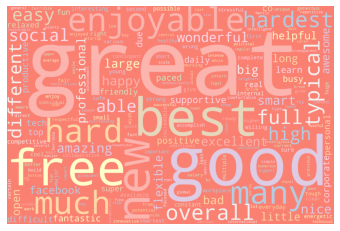

In [ ]:
meta_pros_string = ','.join(pro_adj)

# Generate word cloud
word_cloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(meta_pros_string)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [ ]:
core_values_meta = """Move Fast helps us to build and learn faster than anyone else. This means acting with urgency and not waiting until next week to do something you could do today. At our scale, this also means continuously working to increase the velocity of our highest priority initiatives by methodically removing barriers that get in the way. It's about moving fast together – in one direction as a company, not just as individuals.
Focus on Long-Term Impact emphasizes long-term thinking and encourages us to extend the timeline for the impact we have, rather than optimizing for near-term wins. We should take on the challenges that will be the most impactful, even if the full results won't be seen for years.
Build Awesome Things pushes us to ship things that are not just good, but also awe-inspiring. We've already built products that are useful to billions of people, but in our next chapter we'll focus more on inspiring people as well. This quality bar should apply to everything we do.
Live in the Future guides us to build the future of distributed work that we want, where opportunity isn't limited by geography. This means operating as a distributed-first company and being the early adopters of the future products we're building to help people feel present together no matter where they are.
Be Direct and Respect Your Colleagues is about creating a culture where we are straightforward and willing to have hard conversations with each other. At the same time, we are also respectful and when we share feedback we recognize that many of the world's leading experts work here.
Meta, Metamates, Me is about being good stewards of our company and mission. It's about the sense of responsibility we have for our collective success and to each other as teammates. It's about taking care of our company and each other. """


In [ ]:
meta_cons = ",".join(m_cons_attribute)
meta_pros = ",".join(m_pros_attribute)
data_meta_cons = [core_values_meta, meta_cons]
data_meta_pros = [core_values_meta, meta_pros]

In [ ]:
stopwords_nltk=set(stopwords.words('english'))
count_vectorizer = CountVectorizer(stop_words=stopwords_nltk,decode_error='ignore')
vector_matrix = count_vectorizer.fit_transform(data_meta_pros)
cosine_similarity_matrix = cosine_similarity(vector_matrix)
meta_pro_score = cosine_similarity_matrix[0,1]

In [ ]:
vector_matrix = count_vectorizer.fit_transform(data_meta_cons)
tokens = count_vectorizer.get_feature_names()
cosine_similarity_matrix = cosine_similarity(vector_matrix)
meta_cons_score= cosine_similarity_matrix[0,1]

In [ ]:
print("META : Pro's Cosine Similarity Score:", meta_pro_score)
print("META : Cons's Cosine Similarity Score:", meta_cons_score)

META : Pro's Cosine Similarity Score: 0.05174769818825207
META : Cons's Cosine Similarity Score: 0.012936924547063017


In [ ]:
def remove_new_line(text):
    return re.sub("[^a-zA-Z]"," ",str(text))

def remove_non_alpha(text):
    return re.sub("[^A-Za-z]+", ' ', str(text))

def preprocess_text(text):
    t = remove_new_line(text)
    t = remove_non_alpha(t)
    return t

def lemmatize_words(text, lemmatizer):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_stopwords(text, stopwords):
    return " ".join([word for word in str(text).split() if word not in stopwords])

meta_data['Review_proc'] = meta_data['Review'].apply(preprocess_text).str.lower()

lemmatizer = WordNetLemmatizer()
meta_data['lda_final'] = meta_data['Review_proc'].apply(lambda post: lemmatize_words(post, lemmatizer))

swords = set(stopwords.words('english'))

meta_data['lda_final'] = meta_data['Review_proc'].apply(lambda post: remove_stopwords(post, swords))

In [ ]:
id2word = corpora.Dictionary(meta_data['pros_clean'])
corpus_tf = [id2word.doc2bow(word) for word in meta_data['pros_clean']]
print(corpus_tf[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)]


In [ ]:
tfidf = models.TfidfModel(corpus_tf)
corpus_tfidf = tfidf[corpus_tf]
print(corpus_tfidf[0])

[(0, 0.200229887927374), (1, 0.22539355767567112), (2, 0.1499025484307798), (3, 0.22539355767567112), (4, 0.22539355767567112), (5, 0.17506621817907692), (6, 0.22539355767567112), (7, 0.1855100847440888), (8, 0.14562661181250655), (9, 0.10853709415759462), (10, 0.22539355767567112), (11, 0.200229887927374), (12, 0.17506621817907692), (13, 0.16696532591663288), (14, 0.11001907549919751), (15, 0.10191818323675349), (16, 0.1499025484307798), (17, 0.22539355767567112), (18, 0.13518274524749463), (19, 0.1499025484307798), (20, 0.22539355767567112), (21, 0.16034641499579172), (22, 0.200229887927374), (23, 0.200229887927374), (24, 0.22539355767567112), (25, 0.17506621817907692), (26, 0.22539355767567112), (27, 0.200229887927374), (28, 0.14562661181250655)]


In [ ]:
model = LdaMulticore(corpus=corpus_tf,id2word = id2word, num_topics = 3,
                     alpha=.1, eta=0.1, random_state = 0)

coherence = CoherenceModel(model = model, texts = meta_data['pros_clean'], dictionary = id2word, coherence = 'u_mass')

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
lda_display = pyLDAvis.gensim_models.prepare(model, corpus_tf, id2word, sort_topics = False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


# **NETFLIX DATA**

In [ ]:
net_data["pros_clean"] = net_data.Review.apply(lambda x:re.sub(r'[^\w\s]', ' ', str(x).lower()))
net_data["pros_clean"] = net_data.pros_clean.apply(lambda x:re.sub(r'(\\n+)', ' ', x))
net_data["pros_clean"] = net_data.pros_clean.apply(lambda x:re.sub(r'^b[\'\"\'"\"''\s]', '', x.lower()))
net_data["pros_clean"] = net_data.pros_clean.apply(lambda x:re.sub(r'\s+', ' ', x))

#tokenizing and removing stop words
stop = set(stopwords.words('english'))
punc = string.punctuation
net_data['pros_clean'] = net_data.pros_clean.apply(lambda x: [word for word in word_tokenize(x) if word not in stop])
net_data['pros_clean'] = net_data['pros_clean'].apply(lambda x: [word for word in x if word not in punc])

net_data.head()

<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<ipython-input-60-7ffc8c7c791a>:3: DeprecationWarning: invalid escape sequence \s
  net_data["pros_clean"] = net_data.pros_clean.apply(lambda x:re.sub(r'^b[\'\"\'"\"''\s]', '', x.lower()))


,web-scraper-order,web-scraper-start-url,TItle,TItle-href,Review,rating,pros_clean
0,1664981405-23769,https://www.indeed.com/cmp/Netflix/reviews?sta...,Dynamic place to work,https://www.indeed.com/cmp/Netflix/reviews/dyn...,If you love a quick pace with constant changes...,4.0,"[love, quick, pace, constant, changes, directi..."
1,1664981407-23771,https://www.indeed.com/cmp/Netflix/reviews?sta...,Netflix has a bold culture of innovation and h...,https://www.indeed.com/cmp/Netflix/reviews/net...,Netflix has a bold culture for innovation. It ...,4.0,"[netflix, bold, culture, innovation, compensat..."
2,1664981409-23774,https://www.indeed.com/cmp/Netflix/reviews?sta...,Great fun easy job,https://www.indeed.com/cmp/Netflix/reviews/gre...,I love working here but management is not doin...,5.0,"[love, working, management, job, thats, fall]"
3,1664981411-23776,https://www.indeed.com/cmp/Netflix/reviews?sta...,Human Shield vs the meat grinder,https://www.indeed.com/cmp/Netflix/reviews/hum...,It takes an half an hour to an hour just to ge...,2.0,"[takes, half, hour, hour, get, center]"
4,1664981413-23777,https://www.indeed.com/cmp/Netflix/reviews?sta...,Very disorganized work place,https://www.indeed.com/cmp/Netflix/reviews/ver...,I took anywhere from 80-120+ calls from custom...,3.0,"[took, anywhere, 80, 120, calls, customers, da..."


In [ ]:
#get POS
get_pros = net_data['pros_clean'].apply(lambda x: [word for word in nltk.pos_tag(x)])

pro_adj = []

def get_adj(empty_list,pos_data):
    for review in pos_data:
        for word,pos in review:
            if pos == 'JJ' or pos == 'JJR' or pos == 'JJS': # if the POS-tag is adjective
                empty_list.append(word)
get_adj(pro_adj,get_pros)

In [ ]:
from collections import Counter
Counter(pro_adj).most_common(125)

[('great', 215),
 ('good', 88),
 ('netflix', 56),
 ('best', 52),
 ('new', 45),
 ('easy', 35),
 ('overall', 35),
 ('able', 32),
 ('different', 30),
 ('typical', 30),
 ('much', 29),
 ('hard', 28),
 ('high', 27),
 ('hardest', 26),
 ('sure', 25),
 ('co', 24),
 ('enjoyable', 24),
 ('many', 23),
 ('free', 23),
 ('little', 21),
 ('nice', 20),
 ('due', 19),
 ('happy', 19),
 ('awesome', 19),
 ('friendly', 18),
 ('amazing', 17),
 ('difficult', 16),
 ('bad', 14),
 ('excellent', 14),
 ('helpful', 13),
 ('first', 13),
 ('long', 13),
 ('stressful', 12),
 ('professional', 12),
 ('top', 11),
 ('daily', 11),
 ('flexible', 11),
 ('decent', 10),
 ('positive', 10),
 ('open', 10),
 ('fun', 10),
 ('everyday', 9),
 ('possible', 9),
 ('personal', 9),
 ('advancement', 9),
 ('better', 9),
 ('short', 8),
 ('small', 8),
 ('poor', 8),
 ('certain', 8),
 ('paced', 8),
 ('wonderful', 8),
 ('big', 8),
 ('enjoyed', 8),
 ('early', 7),
 ('call', 7),
 ('weekly', 7),
 ('dvds', 7),
 ('available', 7),
 ('fantastic', 7),
 ('c

In [ ]:
net_pros_attribute = ['best', 'great', 'good', 'enjoyable', 'easy', 'amazing', 'social', 'wonderful', 'nice', 
                  'happy', 'smart', 'excellent', 'large', 'flexible', 'open', 'awesome', 'helpful', 'supportive', 'productive', 
                  'friendly', 'safe', 'respectful', 'energetic', 'top', 'interesting']

In [ ]:
net_cons_attribute = ['little', 'hard', 'different', 'difficult', 'small', 'competitive', 'wrong', 'busy', 'low', 
                  'bad', 'average', 'stressful', 'typical', 'slow', 'short', 'impossible', 'small', 'rude', 'temporary', 'horrible', 'worst', 'hostile', 'tough', 'long']

In [ ]:
net_data['pros_replace'] = net_data['pros_clean'].map(replace_attributes)

In [ ]:
pros_list = replacement.keys()
lift_score = [get_lift(x,y,net_data.pros_replace) for x in net_pros_attribute for y in pros_list]
formatted_lift_score = [ round(elem,2) for elem in lift_score ]

In [ ]:
netflix_pros = pd.DataFrame(reshape(formatted_lift_score,(len(net_pros_attribute),len(pros_list))),index =net_pros_attribute , columns = pros_list )
netflix_pros

,Work_Life_Balance,Culture_Value,Career_Opportunity,Company_Benefit,Senior_Management
best,1.35,1.17,1.16,1.45,1.14
great,1.03,1.18,1.21,1.66,1.15
good,0.77,1.08,1.27,1.48,1.02
enjoyable,2.23,1.55,0.54,0.39,1.40
easy,1.27,0.70,0.58,0.73,1.07
amazing,0.97,1.31,1.45,1.31,1.49
social,2.18,1.62,2.98,2.16,1.23
wonderful,0.65,0.97,1.34,1.29,1.11
nice,0.94,1.16,0.21,0.77,0.79
happy,0.91,1.48,1.49,1.44,1.43


In [ ]:
cons_list = replacement.keys()
lift_score = [get_lift(x,y,net_data.pros_replace) for x in net_cons_attribute for y in cons_list]
formatted_lift_score = [ round(elem,2) for elem in lift_score ]

In [ ]:
netflix_cons =pd.DataFrame(reshape(formatted_lift_score,(len(net_cons_attribute),len(cons_list))),index =net_cons_attribute , columns = cons_list )
netflix_cons

,Work_Life_Balance,Culture_Value,Career_Opportunity,Company_Benefit,Senior_Management
little,0.98,1.34,1.57,2.27,0.92
hard,1.09,1.05,1.04,0.97,1.23
different,1.52,0.95,1.28,1.27,1.05
difficult,2.01,1.49,0.69,1.00,0.57
small,1.40,1.39,2.56,2.31,0.53
competitive,0.00,0.00,0.00,0.00,0.00
wrong,2.18,0.81,1.49,2.16,1.84
busy,1.96,0.97,0.90,1.94,0.74
low,1.96,0.49,0.90,0.65,0.74
bad,1.76,1.49,1.38,1.49,0.85


In [ ]:
netflix_values = ['selflessness', 'courage', 'communication', 'inclusion', 'integrity', 'passion', 'innovation', 'curiosity', 'honesty']

In [ ]:
mission_lift = [get_lift(x,y,net_data.pros_replace) for x in netflix_values for y in pros_list]
formatted_lift_score = [ round(elem,2) for elem in mission_lift ]

In [ ]:
pd.DataFrame(reshape(formatted_lift_score,(len(netflix_values),len(pros_list))),index =netflix_values , columns = pros_list)

,Work_Life_Balance,Culture_Value,Career_Opportunity,Company_Benefit,Senior_Management
selflessness,0.00,0.00,0.00,0.00,0.00
courage,0.00,0.00,0.00,0.00,0.00
communication,0.00,0.00,0.00,0.00,0.00
inclusion,2.18,2.43,1.49,0.00,1.84
integrity,3.27,2.43,0.00,0.00,1.84
passion,0.00,0.00,4.48,0.00,1.84
innovation,1.09,2.43,0.00,2.16,1.23
curiosity,0.00,0.00,0.00,0.00,0.00
honesty,3.27,1.62,0.00,3.24,1.84


In [ ]:
netflix_values = ['selflessness', 'courage', 'communication', 'inclusion', 'integrity', 'passion', 'innovation', 'curiosity', 'honesty']

In [ ]:
mission_lift_pro = [get_lift(x,y,net_data.pros_replace) for x in netflix_values for y in pros_list]
formatted_lift_score_pro = [ round(elem,2) for elem in mission_lift_pro ]

In [ ]:
pd.DataFrame(reshape(formatted_lift_score_pro,(len(netflix_values),len(pros_list))),index =netflix_values , columns = pros_list)

,Work_Life_Balance,Culture_Value,Career_Opportunity,Company_Benefit,Senior_Management
selflessness,0.00,0.00,0.00,0.00,0.00
courage,0.00,0.00,0.00,0.00,0.00
communication,0.00,0.00,0.00,0.00,0.00
inclusion,2.18,2.43,1.49,0.00,1.84
integrity,3.27,2.43,0.00,0.00,1.84
passion,0.00,0.00,4.48,0.00,1.84
innovation,1.09,2.43,0.00,2.16,1.23
curiosity,0.00,0.00,0.00,0.00,0.00
honesty,3.27,1.62,0.00,3.24,1.84


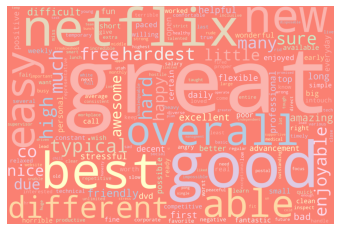

In [ ]:
netflix_pros_string = ','.join(pro_adj)

# Generate word cloud
word_cloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(netflix_pros_string)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [ ]:
core_values_net = """Judgment You make wise decisions despite ambiguity You use data to inform your intuition and choice You look beyond symptoms to identify systemic issues You spend our members’ money wisely You make decisions mostly based on their long term, rather than near term, impact Selflessness You seek what is best for Netflix, not yourself or your team You are humble and open-minded about others’ great ideas You make time to help colleagues across Netflix succeed You debate ideas openly, and help implement whatever decision is made even when you disagree Courage You make tough decisions without agonizing or long delay You take informed risks and are open to possible failure You question colleagues’ actions inconsistent with these behaviors You are willing to be vulnerable, in search of truth and connection You give and take feedback to and from colleagues at any level Communication You listen well and seek to understand before responding You are calm in stressful situations Your writing and thinking are concise and coherent You adapt your communication style so you can work effectively with different people, including those who don’t share your native language or cultural norms Inclusion You work well with people of different backgrounds, identities, values and cultures You are excited to help build diverse teams where everyone feels welcomed and respected You recognize we all have biases and work to counteract them You take action if someone is marginalizing a colleague You treat everyone with respect regardless of their position at Netflix Integrity You exhibit and are known for candor and transparency You only say things about colleagues that you are willing to share with them You admit mistakes openly and share learnings widely You always share relevant information internally, even when uncomfortable You act with good intent and trust your colleagues to do the same Passion You care deeply about Netflix‘s success You inspire others with your drive for excellence You are excited about your work You are proud to entertain the world You are tenacious and optimistic Innovation You develop new ideas that prove impactful You look for every opportunity to reduce complexity and keep things simple You challenge prevailing assumptions, and suggest better approaches You are flexible and thrive in a constantly evolving
 organization Curiosity You learn rapidly and eagerly You seek alternate perspectives to improve your ideas You see patterns and connections that other people miss You seek to understand members’ changing tastes and desires
 """
net_cons = ",".join(net_cons_attribute)
net_pros = ",".join(net_pros_attribute)
data_net_cons = [core_values_net, net_cons]
data_net_pros = [core_values_net, net_pros]

In [ ]:
vector_matrix = count_vectorizer.fit_transform(data_net_pros)
tokens = count_vectorizer.get_feature_names()
cosine_similarity_matrix = cosine_similarity(vector_matrix)
net_pro_score = cosine_similarity_matrix[0,1]

In [ ]:
vector_matrix = count_vectorizer.fit_transform(data_net_cons)
tokens = count_vectorizer.get_feature_names()
cosine_similarity_matrix = cosine_similarity(vector_matrix)
net_cons_score= cosine_similarity_matrix[0,1]

In [ ]:
print("Netflix : Pro's Cosine Similarity Score:", net_pro_score)
print("Netflix : Cons's Cosine Similarity Score:", net_cons_score)

Netflix : Pro's Cosine Similarity Score: 0.061237243569579464
Netflix : Cons's Cosine Similarity Score: 0.060048057676907685


In [ ]:
def remove_new_line(text):
    return re.sub("[^a-zA-Z]"," ",str(text))

def remove_non_alpha(text):
    return re.sub("[^A-Za-z]+", ' ', str(text))

def preprocess_text(text):
    t = remove_new_line(text)
    t = remove_non_alpha(t)
    return t

def lemmatize_words(text, lemmatizer):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_stopwords(text, stopwords):
    return " ".join([word for word in str(text).split() if word not in stopwords])

net_data['Review_proc'] = net_data['Review'].apply(preprocess_text).str.lower()

lemmatizer = WordNetLemmatizer()
net_data['lda_final'] = net_data['Review_proc'].apply(lambda post: lemmatize_words(post, lemmatizer))

swords = set(stopwords.words('english'))

net_data['lda_final'] = net_data['Review_proc'].apply(lambda post: remove_stopwords(post, swords))

In [ ]:
id2word = corpora.Dictionary(net_data['pros_clean'])
corpus_tf = [id2word.doc2bow(word) for word in net_data['pros_clean']]
print(corpus_tf[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


In [ ]:
tfidf = models.TfidfModel(corpus_tf)
corpus_tfidf = tfidf[corpus_tf]
print(corpus_tfidf[0])

[(0, 0.2606459985693938), (1, 0.2935350221812198), (2, 0.3196405088559642), (3, 0.1583245962080889), (4, 0.2935350221812198), (5, 0.4088957573293649), (6, 0.21287706585728222), (7, 0.18377643206881478), (8, 0.2836101767687269), (9, 0.10987105136750175), (10, 0.30527362280609416), (11, 0.33816264641792015), (12, 0.2935350221812198)]


In [ ]:
model = LdaMulticore(corpus=corpus_tf,id2word = id2word, num_topics = 3,
                     alpha=.1, eta=0.1, random_state = 0)

coherence = CoherenceModel(model = model, texts = net_data['pros_clean'], dictionary = id2word, coherence = 'u_mass')

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
lda_display = pyLDAvis.gensim_models.prepare(model, corpus_tf, id2word, sort_topics = False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


# **APPLE DATA**

In [ ]:
app_data["pros_clean"] = app_data.Review.apply(lambda x:re.sub(r'[^\w\s]', ' ', str(x).lower()))
app_data["pros_clean"] = app_data.pros_clean.apply(lambda x:re.sub(r'(\\n+)', ' ', x))
app_data["pros_clean"] = app_data.pros_clean.apply(lambda x:re.sub(r'^b[\'\"\'"\"''\s]', '', x.lower()))
app_data["pros_clean"] = app_data.pros_clean.apply(lambda x:re.sub(r'\s+', ' ', x))

#tokenizing and removing stop words
stop = set(stopwords.words('english'))
punc = string.punctuation
app_data['pros_clean'] = app_data.pros_clean.apply(lambda x: [word for word in word_tokenize(x) if word not in stop])
app_data['pros_clean'] = app_data['pros_clean'].apply(lambda x: [word for word in x if word not in punc])

app_data.head()

<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<ipython-input-82-4d08f4dc7dd2>:3: DeprecationWarning: invalid escape sequence \s
  app_data["pros_clean"] = app_data.pros_clean.apply(lambda x:re.sub(r'^b[\'\"\'"\"''\s]', '', x.lower()))


,web-scraper-order,web-scraper-start-url,Title,Title-href,Review,Rating,pros_clean
0,1664983705-24700,https://www.indeed.com/cmp/Apple/reviews?start...,Specialist,https://www.indeed.com/cmp/Apple/reviews/speci...,Great place to work love the stock options. Ap...,5.0,"[great, place, work, love, stock, options, app..."
1,1664983707-24701,https://www.indeed.com/cmp/Apple/reviews?start...,Fast-paced and demanding - makes the day fly by!,https://www.indeed.com/cmp/Apple/reviews/fast-...,I enjoyed my time at the Apple retail store at...,5.0,"[enjoyed, time, apple, retail, store, millenia..."
2,1664983708-24702,https://www.indeed.com/cmp/Apple/reviews?start...,Absolutely love the culture,https://www.indeed.com/cmp/Apple/reviews/absol...,I loved working here. The culture was amazing....,5.0,"[loved, working, culture, amazing, love, much,..."
3,1664983710-24703,https://www.indeed.com/cmp/Apple/reviews?start...,Love it here,https://www.indeed.com/cmp/Apple/reviews/love-...,Simply put. I love this company. Pay & benefit...,4.0,"[simply, put, love, company, pay, benefits, gr..."
4,1664983713-24705,https://www.indeed.com/cmp/Apple/reviews?start...,Affirming workplace,https://www.indeed.com/cmp/Apple/reviews/affir...,A great place to work in retail. You will acqu...,4.0,"[great, place, work, retail, acquire, skills, ..."


In [ ]:
#get POS
get_pros = app_data['pros_clean'].apply(lambda x: [word for word in nltk.pos_tag(x)])

pro_adj = []

def get_adj(empty_list,pos_data):
    for review in pos_data:
        for word,pos in review:
            if pos == 'JJ' or pos == 'JJR' or pos == 'JJS': # if the POS-tag is adjective
                empty_list.append(word)
get_adj(pro_adj,get_pros)

In [ ]:
from collections import Counter
Counter(pro_adj).most_common(125)

[('great', 562),
 ('good', 284),
 ('retail', 152),
 ('many', 108),
 ('best', 104),
 ('overall', 101),
 ('new', 76),
 ('hard', 72),
 ('much', 66),
 ('bad', 64),
 ('different', 58),
 ('full', 54),
 ('long', 54),
 ('nice', 51),
 ('little', 47),
 ('high', 45),
 ('difficult', 44),
 ('stressful', 43),
 ('easy', 39),
 ('corporate', 37),
 ('able', 36),
 ('sure', 35),
 ('decent', 33),
 ('due', 31),
 ('willing', 31),
 ('cool', 30),
 ('helpful', 30),
 ('amazing', 29),
 ('busy', 29),
 ('supportive', 28),
 ('personal', 26),
 ('excellent', 25),
 ('technical', 25),
 ('available', 24),
 ('awesome', 24),
 ('better', 23),
 ('inclusive', 22),
 ('learn', 22),
 ('right', 22),
 ('advancement', 21),
 ('happy', 21),
 ('top', 21),
 ('positive', 19),
 ('friendly', 19),
 ('higher', 19),
 ('open', 18),
 ('big', 18),
 ('competitive', 18),
 ('fair', 18),
 ('wish', 18),
 ('tech', 18),
 ('low', 17),
 ('want', 17),
 ('enjoyed', 16),
 ('super', 16),
 ('flexible', 16),
 ('ok', 16),
 ('angry', 16),
 ('worth', 16),
 ('poo

In [ ]:
app_pros_attribute = ['best', 'great', 'good', 'enjoyable', 'easy', 'amazing', 'social', 'wonderful', 'nice', 
                  'happy', 'smart', 'excellent', 'large', 'flexible', 'open', 'awesome', 'helpful', 'supportive', 'productive', 
                  'friendly', 'safe', 'respectful', 'energetic', 'top', 'interesting']

In [ ]:
app_cons_attribute = ['little', 'hard', 'different', 'difficult', 'small', 'competitive', 'wrong', 'busy', 'low', 
                  'bad', 'average', 'stressful', 'typical', 'angry', 'short', 'impossible', 'small', 'terrible', 'temporary', 'sick', 'repetitive', 'poor', 'least']

In [ ]:
app_data['pros_replace'] = app_data['pros_clean'].map(replace_attributes)

In [ ]:
pros_list = replacement.keys()
lift_score = [get_lift(x,y,app_data.pros_replace) for x in app_pros_attribute for y in pros_list]
formatted_lift_score = [ round(elem,2) for elem in lift_score ]

In [ ]:
apple_pros = pd.DataFrame(reshape(formatted_lift_score,(len(app_pros_attribute),len(pros_list))),index =app_pros_attribute , columns = pros_list )
apple_pros

,Work_Life_Balance,Culture_Value,Career_Opportunity,Company_Benefit,Senior_Management
best,1.13,1.07,0.90,0.80,1.23
great,1.02,1.08,0.97,1.15,1.12
good,1.05,1.10,1.02,1.19,1.02
enjoyable,1.22,1.71,0.40,0.66,1.31
easy,1.22,0.94,0.95,0.99,0.95
amazing,1.30,1.12,1.16,1.20,1.08
social,0.92,0.64,0.89,1.24,0.99
wonderful,0.98,1.25,1.27,1.19,1.37
nice,0.97,1.16,0.49,1.01,1.04
happy,1.03,1.08,0.50,0.84,1.00


In [ ]:
cons_list = replacement.keys()
lift_score = [get_lift(x,y,app_data.pros_replace) for x in app_cons_attribute for y in cons_list]
formatted_lift_score = [ round(elem,2) for elem in lift_score ]

In [ ]:
apple_cons = pd.DataFrame(reshape(formatted_lift_score,(len(app_cons_attribute),len(cons_list))),index =app_cons_attribute , columns = cons_list )
apple_cons

,Work_Life_Balance,Culture_Value,Career_Opportunity,Company_Benefit,Senior_Management
little,1.35,1.12,1.22,1.34,1.03
hard,1.21,0.91,1.27,1.08,1.00
different,1.44,1.01,1.45,1.14,1.07
difficult,1.31,1.08,1.69,1.02,1.15
small,0.92,1.50,1.49,1.74,0.59
competitive,0.00,0.00,0.00,0.00,0.00
wrong,0.70,0.98,0.68,1.42,1.13
busy,1.41,1.05,0.73,1.22,1.21
low,1.40,1.22,2.04,1.85,0.90
bad,1.27,0.89,1.10,1.27,0.98


In [ ]:
apple_values = ['accessibility', 'education', 'environment', 'diversity', 'inclusion', 'privacy', 'responsibility', 'equity', 'justice']

In [ ]:
mission_lift = [get_lift(x,y,app_data.pros_replace) for x in apple_values for y in pros_list]
formatted_lift_score = [ round(elem,2) for elem in mission_lift]

In [ ]:
pd.DataFrame(reshape(formatted_lift_score,(len(apple_values),len(pros_list))),index =apple_values , columns = pros_list)

,Work_Life_Balance,Culture_Value,Career_Opportunity,Company_Benefit,Senior_Management
accessibility,0.00,0.00,0.00,0.00,0.00
education,0.00,0.00,0.00,0.00,0.00
environment,0.00,0.00,0.00,0.00,0.00
diversity,0.00,0.00,0.00,0.00,0.00
inclusion,0.92,1.71,0.60,1.49,0.79
privacy,2.45,1.71,0.00,0.00,1.58
responsibility,1.22,0.85,1.19,1.49,1.18
equity,0.00,0.00,0.00,0.00,0.00
justice,0.00,0.00,0.00,1.99,0.00


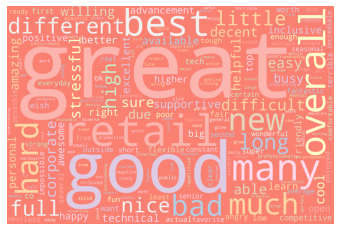

In [ ]:
apple_pros_string = ','.join(pro_adj)

# Generate word cloud
word_cloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(apple_pros_string)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [ ]:
core_values_app = """A healthy respect for well-being. Putting the personal in personalization. Keeping it green and clean. Growing roles into careers. Inspiring minds by augmenting reality. Bringing cultures together and inspiring others. Helping people grow in their own direction. Making products and careers even more accessible. Rethinking a supply chain to reimagine recycling. Connecting products with code. Connecting people with privacy. Accessibility
Technology is most powerful when everyone can make their mark. Education
Education is the great equalizer and a powerful source of opportunity for all. Environment
Our goal is to leave the planet better than we found it. Inclusion and Diversity
We’re committed to making Apple more inclusive and the world more just. Privacy
We design Apple products to protect your privacy and give you control over your information. Racial Equity and Justice Initiative
This is a long-term effort to help ensure more positive outcomes for communities of color. Supplier Responsibility
We believe in a safe, respectful, and supportive workplace for everyone.
 """
app_cons = ",".join(app_cons_attribute)
app_pros = ",".join(app_pros_attribute)
data_app_cons = [core_values_app, app_cons]
data_app_pros = [core_values_app, app_pros]

In [ ]:
stopwords_nltk=set(stopwords.words('english'))
count_vectorizer = CountVectorizer(stop_words=stopwords_nltk,decode_error='ignore')
vector_matrix = count_vectorizer.fit_transform(data_app_pros)
tokens = count_vectorizer.get_feature_names()
cosine_similarity_matrix = cosine_similarity(vector_matrix)
app_pro_score = cosine_similarity_matrix[0,1]

In [ ]:
stopwords_nltk=set(stopwords.words('english'))
count_vectorizer = CountVectorizer(stop_words=stopwords_nltk,decode_error='ignore')
vector_matrix = count_vectorizer.fit_transform(data_app_cons)
tokens = count_vectorizer.get_feature_names()
cosine_similarity_matrix = cosine_similarity(vector_matrix)
net_app_score= cosine_similarity_matrix[0,1]


In [ ]:
print("Apple : Pro's Cosine Similarity Score:", app_pro_score)
print("Apple : Cons's Cosine Similarity Score:", net_app_score)

Apple : Pro's Cosine Similarity Score: 0.07098852075328911
Apple : Cons's Cosine Similarity Score: 0.0


In [ ]:
def remove_new_line(text):
    return re.sub("[^a-zA-Z]"," ",str(text))

def remove_non_alpha(text):
    return re.sub("[^A-Za-z]+", ' ', str(text))

def preprocess_text(text):
    t = remove_new_line(text)
    t = remove_non_alpha(t)
    return t

def lemmatize_words(text, lemmatizer):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_stopwords(text, stopwords):
    return " ".join([word for word in str(text).split() if word not in stopwords])

app_data['Review_proc'] = app_data['Review'].apply(preprocess_text).str.lower()

lemmatizer = WordNetLemmatizer()
app_data['lda_final'] = app_data['Review_proc'].apply(lambda post: lemmatize_words(post, lemmatizer))

swords = set(stopwords.words('english'))

app_data['lda_final'] = app_data['Review_proc'].apply(lambda post: remove_stopwords(post, swords))

In [ ]:
id2word = corpora.Dictionary(app_data['pros_clean'])
corpus_tf = [id2word.doc2bow(word) for word in app_data['pros_clean']]
print(corpus_tf[0])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2)]


In [ ]:
tfidf = models.TfidfModel(corpus_tf)
corpus_tfidf = tfidf[corpus_tf]
print(corpus_tfidf[0])

[(0, 0.05544555227513265), (1, 0.30959924859220334), (2, 0.11537910148099424), (3, 0.3621337408232387), (4, 0.17238963806447724), (5, 0.17336607383219674), (6, 0.2583432014440655), (7, 0.2510403717534413), (8, 0.10236513430849503), (9, 0.34429676482365373), (10, 0.2259005660632321), (11, 0.3304613313698682), (12, 0.43025032820324194), (13, 0.2940171534432354), (14, 0.07917310241528726)]


In [ ]:
model = LdaMulticore(corpus=corpus_tf,id2word = id2word, num_topics = 3,
                     alpha=.1, eta=0.1, random_state = 0)

coherence = CoherenceModel(model = model, texts = app_data['pros_clean'], dictionary = id2word, coherence = 'u_mass')

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
lda_display = pyLDAvis.gensim_models.prepare(model, corpus_tf, id2word, sort_topics = False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


# **AMAZON DATA**

In [ ]:
amaz_data["pros_clean"] = amaz_data.Review.apply(lambda x:re.sub(r'[^\w\s]', ' ', str(x).lower()))
amaz_data["pros_clean"] = amaz_data.pros_clean.apply(lambda x:re.sub(r'(\\n+)', ' ', x))
amaz_data["pros_clean"] = amaz_data.pros_clean.apply(lambda x:re.sub(r'^b[\'\"\'"\"''\s]', '', x.lower()))
amaz_data["pros_clean"] = amaz_data.pros_clean.apply(lambda x:re.sub(r'\s+', ' ', x))

#tokenizing and removing stop words
stop = set(stopwords.words('english'))
punc = string.punctuation
amaz_data['pros_clean'] = amaz_data.pros_clean.apply(lambda x: [word for word in word_tokenize(x) if word not in stop])
amaz_data['pros_clean'] = amaz_data['pros_clean'].apply(lambda x: [word for word in x if word not in punc])

amaz_data.head()

<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<ipython-input-101-db96732377a9>:3: DeprecationWarning: invalid escape sequence \s
  amaz_data["pros_clean"] = amaz_data.pros_clean.apply(lambda x:re.sub(r'^b[\'\"\'"\"''\s]', '', x.lower()))


,web-scraper-order,web-scraper-start-url,Title,Title-href,Review,Rating,pros_clean
0,1664946410-22654,https://www.indeed.com/cmp/Amazon.com/reviews?...,"Great place to work, friendly co workers and g...",https://www.indeed.com/cmp/Amazon.com/reviews/...,"Depending on where you go with Amazon, from th...",5.0,"[depending, go, amazon, central, operations, w..."
1,1664946412-22655,https://www.indeed.com/cmp/Amazon.com/reviews?...,They do not care about you. Only numbers matte...,https://www.indeed.com/cmp/Amazon.com/reviews/...,It is the lack of care that other hr and opt m...,1.0,"[lack, care, hr, opt, managers, managers, prob..."
2,1664946414-22656,https://www.indeed.com/cmp/Amazon.com/reviews?...,"If you have any respect for yourself, just don’t.",https://www.indeed.com/cmp/Amazon.com/reviews/...,"Management is terrible, a lot of favoritism, i...",1.0,"[management, terrible, lot, favoritism, go, hr..."
3,1664946416-22657,https://www.indeed.com/cmp/Amazon.com/reviews?...,Warehouse worker,https://www.indeed.com/cmp/Amazon.com/reviews/...,It was a great job I enjoyed my co-workers.I a...,5.0,"[great, job, enjoyed, co, workers, also, aweso..."
4,1664946418-22658,https://www.indeed.com/cmp/Amazon.com/reviews?...,Best for no experience people,https://www.indeed.com/cmp/Amazon.com/reviews/...,If you need a side gig or have no experience t...,3.0,"[need, side, gig, experience, prob, best, bet,..."


In [ ]:
#get POS
get_pros = amaz_data['pros_clean'].apply(lambda x: [word for word in nltk.pos_tag(x)])

pro_adj = []

def get_adj(empty_list,pos_data):
    for review in pos_data:
        for word,pos in review:
            if pos == 'JJ' or pos == 'JJR' or pos == 'JJS': # if the POS-tag is adjective
                empty_list.append(word)
get_adj(pro_adj,get_pros)

In [ ]:
from collections import Counter
Counter(pro_adj).most_common(125)

[('good', 339),
 ('great', 223),
 ('easy', 119),
 ('hard', 101),
 ('many', 77),
 ('long', 76),
 ('much', 72),
 ('bad', 70),
 ('new', 69),
 ('nice', 64),
 ('amazon', 63),
 ('overall', 62),
 ('different', 58),
 ('best', 55),
 ('decent', 43),
 ('high', 39),
 ('repetitive', 34),
 ('short', 33),
 ('little', 33),
 ('flexible', 32),
 ('able', 31),
 ('ok', 31),
 ('first', 29),
 ('full', 29),
 ('stressful', 28),
 ('busy', 28),
 ('physical', 26),
 ('enough', 24),
 ('horrible', 24),
 ('due', 24),
 ('low', 24),
 ('extra', 22),
 ('worth', 22),
 ('whole', 22),
 ('strict', 22),
 ('give', 21),
 ('certain', 21),
 ('helpful', 20),
 ('top', 20),
 ('okay', 19),
 ('hr', 18),
 ('u', 18),
 ('free', 18),
 ('want', 18),
 ('poor', 18),
 ('terrible', 17),
 ('real', 17),
 ('overtime', 17),
 ('everyday', 17),
 ('difficult', 16),
 ('open', 16),
 ('sure', 16),
 ('learn', 16),
 ('higher', 16),
 ('mandatory', 15),
 ('heavy', 15),
 ('personal', 15),
 ('friendly', 15),
 ('cool', 15),
 ('pick', 15),
 ('unpaid', 15),
 ('s

In [ ]:
amaz_pros_attribute = ['best', 'great', 'good', 'enjoyable', 'easy', 'amazing', 'social', 'wonderful', 'nice', 
                  'happy', 'smart', 'excellent', 'large', 'flexible', 'open', 'awesome', 'helpful', 'supportive', 'productive', 
                  'friendly', 'safe', 'respectful', 'energetic', 'top', 'interesting']

In [ ]:
amaz_cons_attribute = ['little', 'hard', 'different', 'difficult', 'small', 'competitive', 'wrong', 'busy', 'low', 
                  'bad', 'average', 'stressful', 'typical', 'strict', 'short', 'impossible', 'worst', 'terrible', 'temporary', 'repetitive', 'awful', 'boring', 'unorganized', 'negative']

In [ ]:
amaz_data['pros_replace'] = amaz_data['pros_clean'].map(replace_attributes)

In [ ]:
pros_list = replacement.keys()
lift_score = [get_lift(x,y,amaz_data.pros_replace) for x in amaz_pros_attribute for y in pros_list]
formatted_lift_score = [ round(elem,2) for elem in lift_score ]

In [ ]:
amaz_pros = pd.DataFrame(reshape(formatted_lift_score,(len(amaz_pros_attribute),len(pros_list))),index =amaz_pros_attribute , columns = pros_list )
amaz_pros

,Work_Life_Balance,Culture_Value,Career_Opportunity,Company_Benefit,Senior_Management
best,1.17,1.51,1.23,1.08,1.30
great,1.02,1.20,1.49,1.31,1.33
good,1.07,0.91,1.12,1.33,1.08
enjoyable,1.45,1.87,0.46,0.89,1.63
easy,1.13,0.96,0.79,1.01,0.74
amazing,1.10,1.10,0.54,1.18,1.07
social,1.38,1.78,1.53,1.12,0.60
wonderful,0.52,0.67,3.45,1.12,1.36
nice,0.84,1.29,1.22,1.05,1.08
happy,0.00,1.33,0.00,0.00,1.81


In [ ]:
cons_list = replacement.keys()
lift_score = [get_lift(x,y,amaz_data.pros_replace) for x in amaz_cons_attribute for y in cons_list]
formatted_lift_score = [ round(elem,2) for elem in lift_score ]

In [ ]:
amaz_cons = pd.DataFrame(reshape(formatted_lift_score,(len(amaz_cons_attribute),len(cons_list))),index =amaz_cons_attribute , columns = cons_list )
amaz_cons

,Work_Life_Balance,Culture_Value,Career_Opportunity,Company_Benefit,Senior_Management
little,1.17,1.15,1.37,1.15,1.23
hard,1.09,1.09,0.84,1.14,0.99
different,1.16,1.06,1.82,0.98,1.02
difficult,0.83,0.89,0.92,1.19,0.97
small,1.13,0.73,0.42,1.62,0.82
competitive,0.00,0.00,0.00,0.00,0.00
wrong,1.45,1.07,0.92,0.45,1.45
busy,1.18,0.67,1.15,0.72,1.10
low,1.26,1.51,1.80,1.55,1.18
bad,1.22,0.85,0.56,1.25,1.02


In [ ]:
amazon_values = ['customer', 'invention', 'excellence', 'safe', 'empowerment', 'support', 'community', 'create', 'service']

In [ ]:
mission_lift = [get_lift(x,y,amaz_data.pros_replace) for x in amazon_values for y in pros_list]
formatted_lift_score = [ round(elem,2) for elem in mission_lift]

In [ ]:
pd.DataFrame(reshape(formatted_lift_score,(len(amazon_values),len(pros_list))),index =amazon_values , columns = pros_list)

,Work_Life_Balance,Culture_Value,Career_Opportunity,Company_Benefit,Senior_Management
customer,1.16,0.50,0.57,1.26,0.91
invention,0.00,0.00,0.00,0.00,0.00
excellence,0.00,0.00,0.00,0.00,0.00
safe,0.41,0.53,2.76,0.89,1.45
empowerment,0.00,0.00,0.00,0.00,0.00
support,0.00,0.00,0.00,0.00,0.00
community,0.00,0.00,0.00,0.00,0.00
create,1.18,0.76,1.97,0.96,1.56
service,1.24,0.80,0.46,1.34,0.91


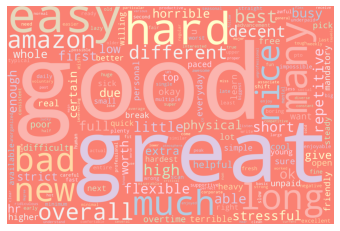

In [ ]:
amaz_pros_string = ','.join(pro_adj)

# Generate word cloud
word_cloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(amaz_pros_string)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [ ]:
core_values_amaz = """Leaders are customer-obsessed. In any business, it is easy to begin from an internal perspective – in other words, thinking first about your product or other offering, then working down the line until you reach the customer. For Amazon, its first principle is to start with the customer, then work backwards. This self-professed “obsession” with how the customer thinks and feels is intended to create deep and lasting trust from customers, since all Amazon leaders begin with the customer in mind. Leaders take ownership. Companies are starting to think outside of a “silo” approach that limits their area of influence. Amazon expects all of its employees to take full ownership of the entire company, not just what their specific team has been assigned to do. Employees should think about how their decisions and their work will affect the entire enterprise and ensure that they are creating long-lasting value instead of just a short-term boost. Leaders invent and simplify. Innovation is key for all Amazon employees. The company looks for people who are willing to try new things, surprise others with their ideas, and pull inspiration from virtually everywhere. What’s more, this innovation should be produced and delivered in such a way that it is simple to understand and execute. A simple yet powerful idea trumps a convoluted plan every time, and even if the goal seems unattainable or the path seems unusual, employees should commit and make their dreams a reality. Leaders are right, a lot. This is another way of saying that employees should possess and use good judgment, not that they are required to be correct and accurate
 every second of every day. Being “right” means that they should have a good instinct for what will work and what will not, and when presented with several options, they should be quick to discern what will create the best outcomes. This also includes a strong element of collaboration, ensuring that everyone’s voice is heard before making the “right” call. Leaders learn and are curious. Ideas and inspiration can come from all sorts of places. Employees at Amazon are expected to be lifelong learners. Just because they come with credentials, education, or experience in a particular area does not mean that they should limit themselves to that area their entire careers. They should also not rest on their current knowledge base, but should keep themselves on the cutting edge of industry trends. They should constantly be on the lookout for how their new learnings, their present experience, and their problems can intersect. Leaders hire and develop the best. Amazon is proud to recognize excellence within its organization, and is always willing to promote from within when it sees individuals who have the potential to excel. Each and every hiring decision is expected to improve the overall performance of each division. This also applies to mentorship and leadership coaching within the existing management structure; employees are expected to grow and mature as leaders, with the understanding that they could become leaders themselves someday. Leaders insist on the highest standards. Perfection is the bar, and nothing else is satisfactory. Only the highest quality in products, the highest reliability and delivery in services, and the highest degree of excellence in day-to-day activities will be acceptable to Amazon. These standards may appear unreasonable to those outside the organization, but all employees commit to this standard when joining Amazon. If problems do arise, they are addressed immediately and completely so that they do not affect things 
 later on, and mistakes or accidents always result in some kind of positive learning experience. Leaders think big. Bold directions and massive goals are the order of the day at Amazon.
  Employees at every level of the company should reach for bigger goals than they think are possible, because striving for greatness and not accepting anything less gives you the best chance to deliver. If employees are willing to settle for second-best, they will usually get it. Only by stretching to the limit can Amazon continue its upward streak of excellence. Leaders have a bias for action. It’s easy for companies to take extended periods of time to make a decision. When market share or profit margins depend on quick action and delivery to market, such delays can be devastating. Amazon employees are expected to spring into action quickly when opportunity arises. This “bias for action” does not mean that any course is unchangeable; decisions can be modified or even canceled, but waiting out of fear or mere uncertainty is not acceptable. Leaders are frugal. Resourcefulness, efficiency, and, yes, “frugality” are all words that should describe Amazon employees. This does not mean that costs should be sacrificed at the expense of quality – delivering a high-quality product is even more important than the cost. That being said, having an oversized budget for the sake of sharing how much you spent to deliver excellence is simply uncalled for. If there are ways to do more with less, and leaders should find a way to do so. This shows that they are committed to excellence while also being responsible stewards of the funds and resources at their disposal. Leaders earn trust. Trust is critical for any company, whether it is between the business and 
  its customers or among its own employees. Amazon holds itself to a high standard as far as trust is concerned. It strives to be trustworthy in all things, presenting an image of true integrity. This also involves being vulnerable and honest, open to criticism and feedback, and willing to admit fault when necessary. It also makes it a point to be forthright in a constructive way when giving its own thoughts and opinions. Leaders dive deep. Similar to being open to new ideas and ways of doing things, Amazon employees should focus on both the big picture and the smallest details. Nothing is outside of their sphere of influence; they need to pay attention to, and be willing to work with, anything the job requires. This means keeping careful track of their own workloads as well as the general success of the company and its ability to perform well. If there is an apparent discrepancy, employees need to be able to get to the bottom of the disconnect and find out the true picture. Leaders have a backbone, but commit despite disagreements. This can seem like a contradictory point, but it all boils down to a spirit of deep collaboration built on openness and honesty. Differing opinions should always be voiced respectfully, but employees should not keep them hidden in an attempt to keep the peace. Disagreements are allowed and encouraged if they are sincerely held, but once a consensus is reached and a final decision is made, everyone is expected to follow directions. They can at least do so knowing that their objections have been heard and respected. Leaders deliver results. As with any company, Amazon expects its employees to create positive results. Whether that leads to direct sales, improvements to a product or service line, or increased efficiency for back-office work, every employee should create high value with the quality, timeliness, and investment in their work. Even if things do not go according to plan, the milestones are the milestones and excuses will not be tolerated.
 """
amaz_cons = ",".join(amaz_cons_attribute)
amaz_pros = ",".join(amaz_pros_attribute)
from sklearn.feature_extraction.text import CountVectorizer
data_amaz_cons = [core_values_amaz, amaz_cons]
data_amaz_pros = [core_values_amaz, amaz_pros]

In [ ]:
stopwords_nltk=set(stopwords.words('english'))
count_vectorizer = CountVectorizer(stop_words=stopwords_nltk,decode_error='ignore')
vector_matrix = count_vectorizer.fit_transform(data_amaz_pros)
tokens = count_vectorizer.get_feature_names()
cosine_similarity_matrix = cosine_similarity(vector_matrix)
amaz_pro_score = cosine_similarity_matrix[0,1]

In [ ]:
stopwords_nltk=set(stopwords.words('english'))
count_vectorizer = CountVectorizer(stop_words=stopwords_nltk,decode_error='ignore')
vector_matrix = count_vectorizer.fit_transform(data_amaz_cons)
tokens = count_vectorizer.get_feature_names()
cosine_similarity_matrix = cosine_similarity(vector_matrix)
amaz_app_score= cosine_similarity_matrix[0,1]

In [ ]:
print("Amazon : Pro's Cosine Similarity Score:", amaz_pro_score)
print("Amazon : Cons's Cosine Similarity Score:", amaz_app_score)

Amazon : Pro's Cosine Similarity Score: 0.044867416382531805
Amazon : Cons's Cosine Similarity Score: 0.0045792615089247325


In [ ]:
def remove_new_line(text):
    return re.sub("[^a-zA-Z]"," ",str(text))

def remove_non_alpha(text):
    return re.sub("[^A-Za-z]+", ' ', str(text))

def preprocess_text(text):
    t = remove_new_line(text)
    t = remove_non_alpha(t)
    return t

def lemmatize_words(text, lemmatizer):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_stopwords(text, stopwords):
    return " ".join([word for word in str(text).split() if word not in stopwords])

amaz_data['Review_proc'] = amaz_data['Review'].apply(preprocess_text).str.lower()

lemmatizer = WordNetLemmatizer()
amaz_data['lda_final'] = amaz_data['Review_proc'].apply(lambda post: lemmatize_words(post, lemmatizer))

swords = set(stopwords.words('english'))

amaz_data['lda_final'] = amaz_data['Review_proc'].apply(lambda post: remove_stopwords(post, swords))

In [ ]:
id2word = corpora.Dictionary(amaz_data['pros_clean'])
corpus_tf = [id2word.doc2bow(word) for word in amaz_data['pros_clean']]
print(corpus_tf[0])

[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)]


In [ ]:
tfidf = models.TfidfModel(corpus_tf)
corpus_tfidf = tfidf[corpus_tf]
print(corpus_tfidf[0])

[(0, 0.25339390645185733), (1, 0.15887402240655774), (2, 0.19426097403328466), (3, 0.07183125954554331), (4, 0.25339390645185733), (5, 0.1398248131148315), (6, 0.12605806743777012), (7, 0.14332663842764976), (8, 0.141534021602712), (9, 0.11116072927354874), (10, 0.19426097403328466), (11, 0.10966087381189457), (12, 0.1726648945177796), (13, 0.08275268379729536), (14, 0.09194505657011517), (15, 0.20245957084622243), (16, 0.18756223268200103), (17, 0.0431016246490589), (18, 0.2763831901010246), (19, 0.135128041614712), (20, 0.14332663842764976), (21, 0.25339390645185733), (22, 0.1452112236527845), (23, 0.08973514359852756), (24, 0.18756223268200103), (25, 0.1452112236527845), (26, 0.06535187022903724), (27, 0.1381915950505123), (28, 0.11878968123870884), (29, 0.11353196209920698), (30, 0.16879380623046722), (31, 0.1323003885507408), (32, 0.2498549499012202), (33, 0.22792673864903987), (34, 0.21302940048481847), (35, 0.05606937898277234), (36, 0.09285446434586099), (37, 0.0200537490073258

In [ ]:
model = LdaMulticore(corpus=corpus_tf,id2word = id2word, num_topics = 3,
                     alpha=.1, eta=0.1, random_state = 0)

coherence = CoherenceModel(model = model, texts = amaz_data['pros_clean'], dictionary = id2word, coherence = 'u_mass')

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
lda_display = pyLDAvis.gensim_models.prepare(model, corpus_tf, id2word, sort_topics = False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
